In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [16]:
#Load Dataset and show total missing value
movies = pd.read_csv('imdb_top_2000_movies.csv')
movies
print("Missing Value before drop Na")
print(movies.isnull().sum()) #--> Cek missing volue each coloumn
print(movies.shape)
movies = movies.dropna(axis=0)
print("")
print("Missing Value after drop Na")
print(movies.isnull().sum())
print(movies.shape)

Missing Value before drop Na
Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64
(2000, 10)

Missing Value after drop Na
Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64
(1870, 10)


In [17]:
movies.dtypes #check variabel metascore and IMDB rating

Movie Name       object
Release Year     object
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes            object
Genre            object
Director         object
Cast             object
Gross            object
dtype: object

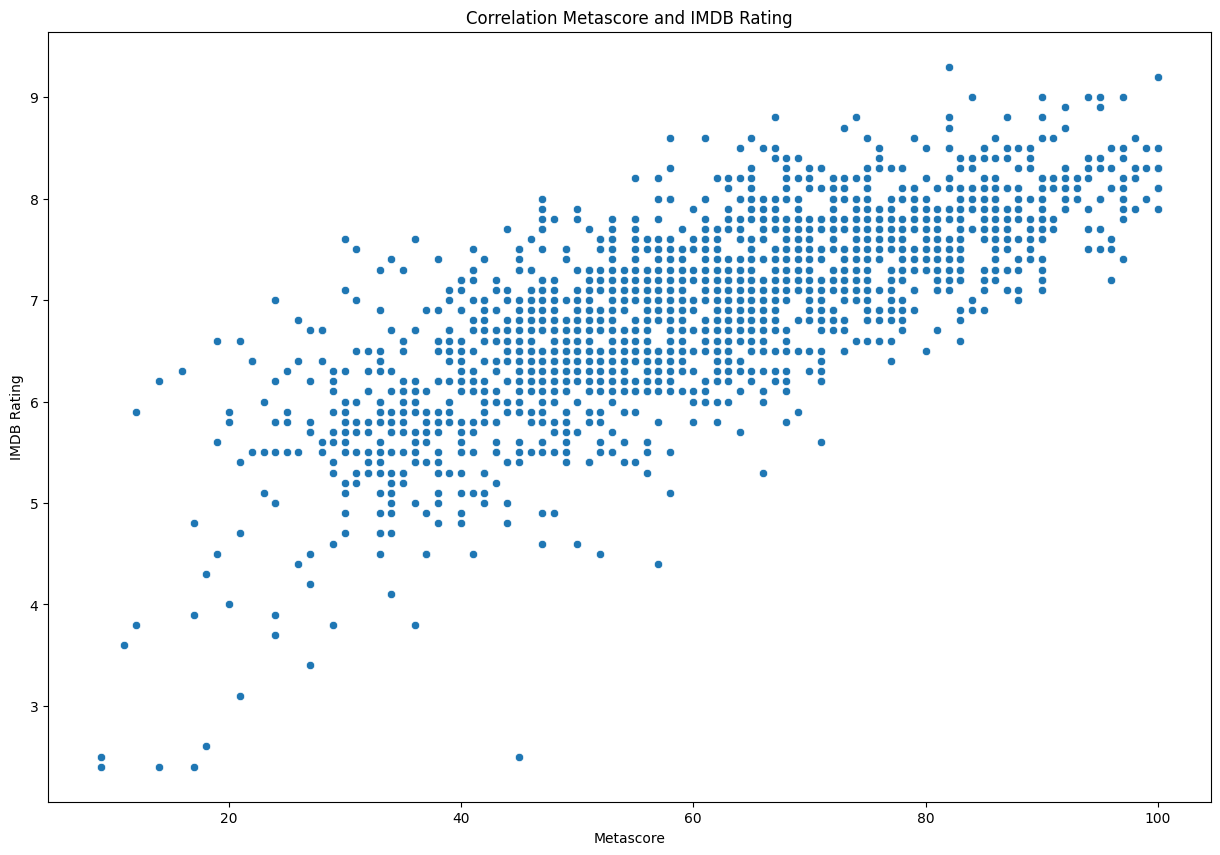

In [18]:
#Mencari hubungan antara variabel metascore and rating -->linier
plt.figure(figsize=(15,10))
sns.scatterplot(data=movies, y='IMDB Rating',x='Metascore')
plt.title('Correlation Metascore and IMDB Rating')
plt.savefig('7.jpeg')

In [19]:
#Deklarasi target dan input/feature
X = movies['Metascore']
Y=  movies['IMDB Rating']

In [20]:
#Cek jumlah data target dan feature
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.75,random_state=0000)
print(f'X Train = {X_train.shape}')
print(f'X Test = {X_test.shape}')
print(f'Y Train = {Y_train.shape}')
print(f'Y Test = {Y_test.shape}')

X Train = (1402,)
X Test = (468,)
Y Train = (1402,)
Y Test = (468,)


In [21]:
X_train=X_train.to_frame()
Y_train=Y_train.to_frame()

In [23]:
#Proses Learning
lr= LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [24]:
#Mencari nilai intercept dan koefisien
print(f'Intercept = {lr.intercept_}')
print(f'Coefission = {lr.coef_}')

Intercept = [4.63382777]
Coefission = [[0.03752054]]


In [ ]:
# Persamaan:   Y= 0.0375X+4.633

In [25]:
#Proses Test
X_test=X_test.to_frame()
Y_predict= lr.predict(X_test)

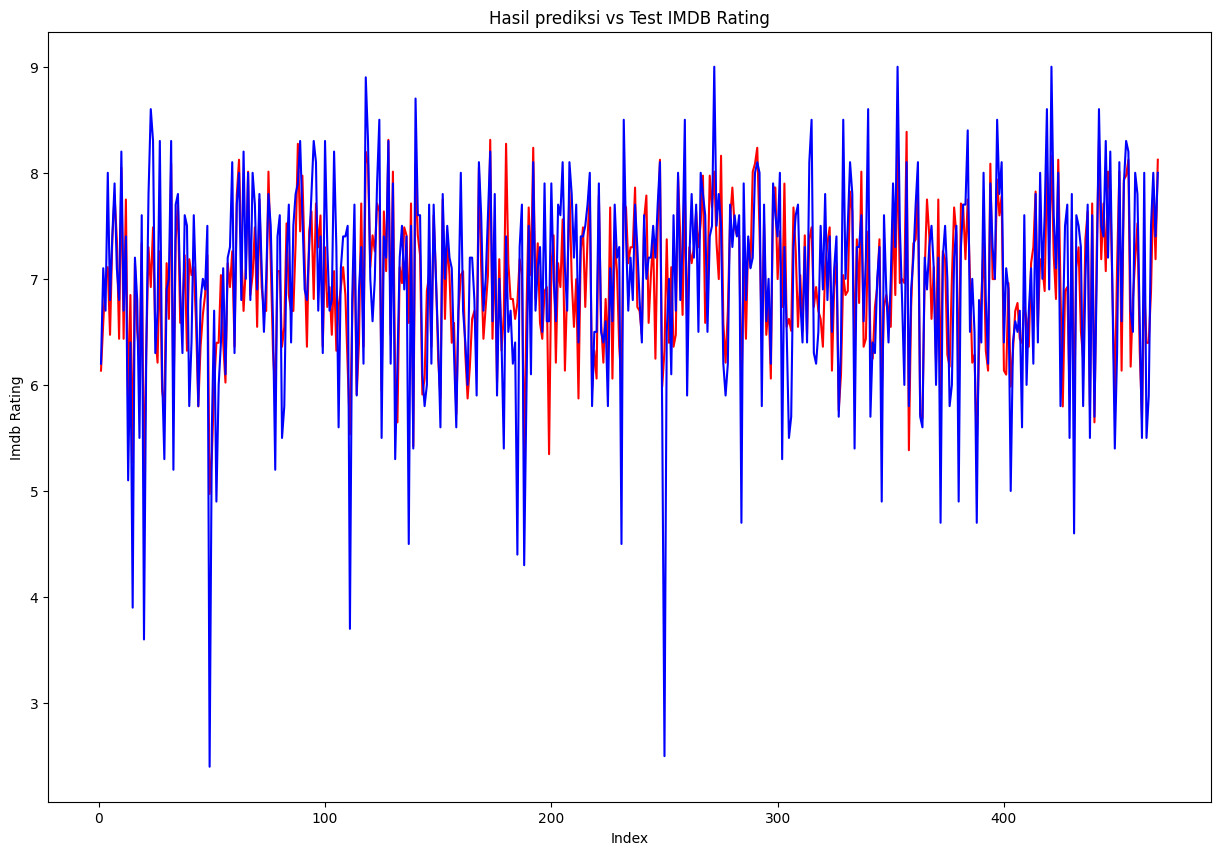

In [26]:
plt.figure(figsize=(15,10))
plt.plot(range(1,469), Y_predict,color='red')
plt.plot(range(1,469), Y_test,color='blue')
plt.xlabel('Index')
plt.ylabel('Imdb Rating')
plt.title('Hasil prediksi vs Test IMDB Rating')

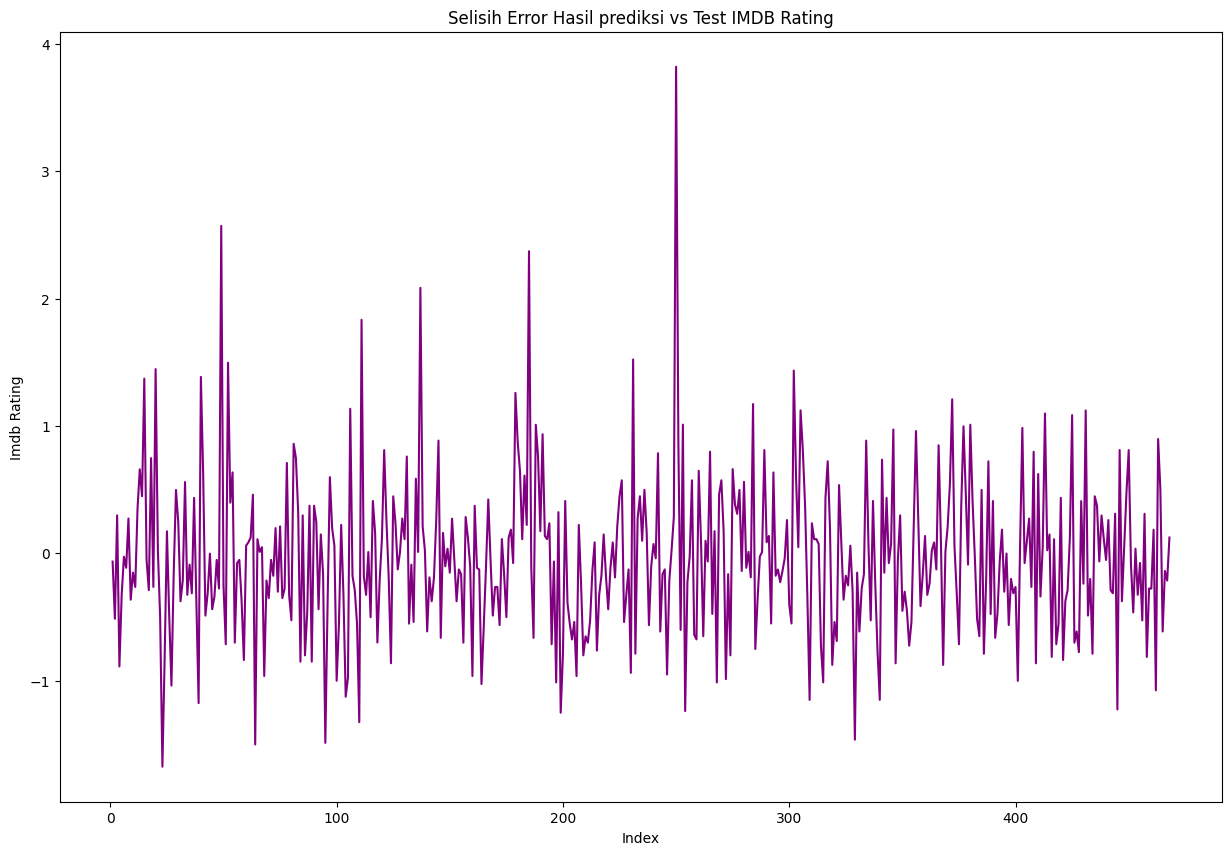

In [27]:
plt.figure(figsize=(15,10))
plt.plot(range(1,469), Y_predict.flatten()-Y_test,color='purple')
plt.xlabel('Index')
plt.ylabel('Imdb Rating')
plt.title('Selisih Error Hasil prediksi vs Test IMDB Rating')

In [19]:
#Menghitung nilai MSE
mean_squared_error(Y_test,Y_predict)

0.3829805968526468

In [20]:
#Menghitung nilai R_Square
r_squared= r2_score(Y_test,Y_predict)
r_squared

0.5823684802594806

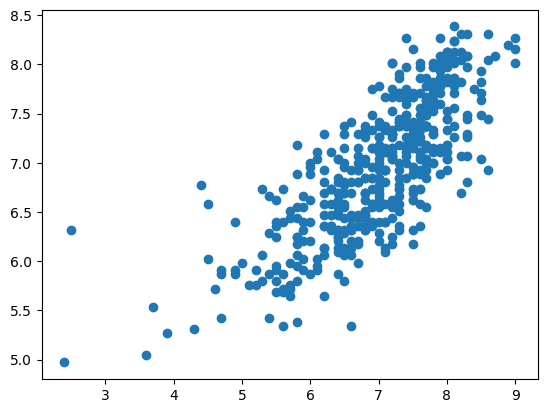

In [21]:
#Hubungan Y_test and Y_Predict
plt.scatter(Y_test,Y_predict)
plt.title('Hubungan antara Y_Test dan Y_predict')

In [23]:
#Menyimpal model ML
joblib.dump(lr, 'model_regresi_linear.pkl')

['model_regresi_linear.pkl']

In [24]:
#Load ML untuk dicoba
lr_loaded = joblib.load('model_regresi_linear.pkl')

In [37]:
#Mencoba ML untuk menebak score
metascore = pd.DataFrame({'Metascore':[100]})
predicted_imdb_score = lr_loaded.predict(metascore)
print(f'Prediksi skor IMDb dengan metascore {metascore.values} adalah: {predicted_imdb_score}')

Prediksi skor IMDb dengan metascore [[100]] adalah: [[8.38588166]]
